# Banking Marketing Targets #Absolute

In [ ]:
# STAGE 1. Banking Dataset #Absolute
Kelompok 7: 
1. Fikrie Lazuardi 
2. Rian Dwi Haryono
3. Retno dwi
4. Wahyuni
5. Hidayat Yatul
6. Yunita Rachmawati
7. Retno Harindhi

# final Project stage 0

Problem : banyaknya nasabah yang belum memiliki keinginan untuk membeli deposito dan di satu sisi tim marketing sudah memberikan penawaran ke banyak orang

goals : meningkatkan jumlah nasabah yg membeli deposito

objective :

Membuat machine learning model untuk memprediksi nasabah yang berpotensi membeli deposito
Membuatsistem pengelompokkan nasabah berdasarkan insight data
Membuat model penawaran khusus deposito (conversion rate) sesuai dengan data calon nasabah
business metrics : Client subscribed deposit conversion rate

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches   
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mtick
from matplotlib import transforms
from matplotlib.patches import FancyArrow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import warnings
warnings.filterwarnings("ignore")

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [12]:
# Read Dataset

from google.colab import files
uploaded = files.upload()

import pandas as pd
dftrain = pd.read_csv('train.csv',sep=';')


Saving train.csv to train (1).csv


In [13]:
dftrain.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30614,41,management,married,secondary,no,611,yes,no,cellular,6,feb,38,1,212,1,other,no
13249,38,blue-collar,single,secondary,no,10,no,no,cellular,8,jul,84,3,-1,0,unknown,no
4840,37,technician,divorced,secondary,no,1176,no,yes,unknown,21,may,282,2,-1,0,unknown,no
30887,45,blue-collar,divorced,primary,no,1512,yes,no,cellular,9,feb,13,11,-1,0,unknown,no
10360,59,retired,married,secondary,no,3353,no,no,unknown,12,jun,148,1,-1,0,unknown,no


# final Project stage 1

In [12]:
dftrain.info()   #informasi data berdasarkan tipe data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 1. Descriptive Statistics

### Data Exploration



numericals : 
age      = berdasarkan umur nasabah ('18 tahun - 95 tahun') 
balance  = saldo nasabah     
day      = day/ tanggal nasabah dihubungi oleh marketing     
duration = durasi terakhir panggilan     
campaign = jumlah kontak yang dilakukan selama kampanye    
pdays    = jumlah hari yang berlalu setelah klien terakhir dihubungi 
previous = jumlah kontak yang dilakukan sebelum kampanye 


categoricals: 
job = jenis pekerjaan nasabah  
marital = status pernikahan nasabah  ("married","divorced","single")
education = tingkat pendidikan nasabah   
default = apakah sebelumnya sudah memiliki kredit?   
housing = apakah nasabah memiliki cicilan rumah?   
loan = apakah memiliki pinjaman pribadi?    
contact = jenis komunikasi saat dihubungi
month = bulan terakhir dihubungi     
poutcome = hasil dr campaign 
y = pembelian deposito kategori yes/no 

In [13]:
#cek missing value setiap kolom
dftrain.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
dftrain.duplicated().any()

False

In [14]:
# value counting berdasarkan kolom y
dftrain['y'].value_counts() 

no     39922
yes     5289
Name: y, dtype: int64

### Statisctical Summary

In [10]:
# dataset berdasarkan tipe data 
numericals = ['age','balance','day', 'duration','campaign','pdays','previous']
categoricals = ['job','marital', 'education','default','housing','loan', 'contact','month', 'poutcome', 'y']

dftrain[numericals].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Catatan: <br>
1.Kolom age dan day memiliki sedikit perbedaan pada persebaran datanya, berbeda dengan kolom balance dan pdays yang memiliki persebaran data yang sangat besar

2.Perbedaan yang cukup signifikan antara mean/median dengan max mengindikasikan outlier yang juga signifikan

In [20]:
dftrain[categoricals].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


1. Dari 12 pekerjaan, blue-collar adalah yang terbanyak 
2. Nasabah dengan status sudah menikah merupakan nasabah terbanyak 
3. Kebanyakan status pendidikan nasabah berdasarkan data adalah secondary 
4. Default "no" merupakan data yang banyak ditemukan pada nasabah 
5. Kebanyakan nasabah telah memiliki rumah 
6. Nasabah yang tidak memiliki pinjaman merupakan nasabah terbanyak 
7. Nasabah kebanyakan dihubungi melalui cellular 
8. Data month yang paling banyak adalah Mei (May) 
9. poutcome yang paling banyak ditemukan adalah unknown 
10. Nilai dari y yang paling sering muncul adana "no" yang berarti bahwa banyak nasabah yang belum menjadi nasabah dengan deposito

In [24]:
# value counting data categoricals
for col in categoricals:
    print(f'''Data Value count kolom {col}: ''')
    print(dftrain[col].value_counts())
    print()

Data Value count kolom job: 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Data Value count kolom marital: 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Data Value count kolom education: 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Data Value count kolom default: 
no     44396
yes      815
Name: default, dtype: int64

Data Value count kolom housing: 
yes    25130
no     20081
Name: housing, dtype: int64

Data Value count kolom loan: 
no     37967
yes     7244
Name: loan, dtype: int64

Data Value count kolom contact: 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Data Value count kolom month: 
may    13766
jul

In [15]:
# value counting data numeric 
for col in numericals:
    print(f'''Data Value count kolom {col}: ''')
    print(dftrain[col].value_counts())
    print()


Data Value count kolom age: 
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Data Value count kolom balance: 
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

Data Value count kolom day: 
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Data Value count kolom duration: 
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: durat

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
Jawaban : Semua tipe data sudah sesuai

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
Jawaban : Tidak ada kolom yang memiliki nilai kosong

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)<br>
Jawaban :  Karena kolom balance memiliki standar deviasi yg sangat tinggi dimana hasil describe() menyatakan 
terlalu jauh dari mean/ median sehingga muncul keanehan, bisa jadi indikasi terjadi kesalahan 
dalam input data.


## Univariate Analysis

Feature = X 
Target = Y 

In [15]:
#memisahkan data tipe Kontinu(Interval)
numericals = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
categoricals = ['marital','education','month','job','default','housing','loan','contact','poutcome', 'y']

### Individual Boxplot Interval

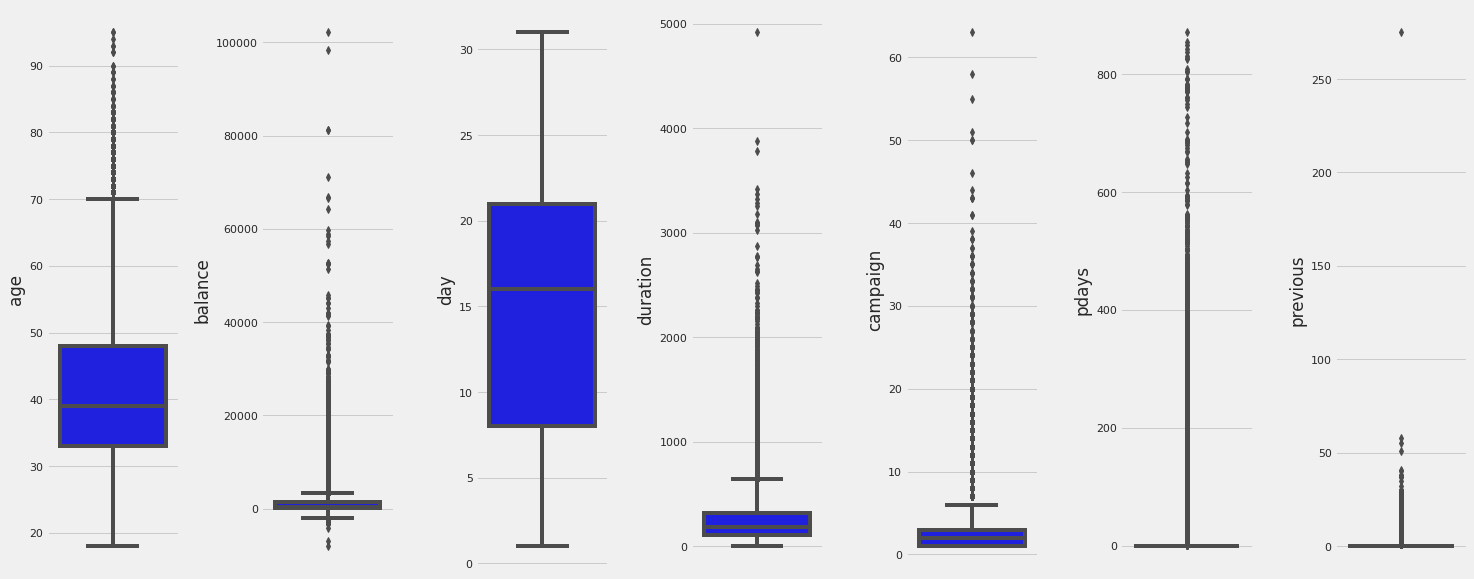

In [17]:
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals),i+1)
    sns.boxplot(y=dftrain[numericals[i]], color='blue', orient='v')
    plt.tight_layout();

1.Pada kelompok data numerikal, hampir seluruhnya memiliki banyak outlier.

2.Pada kolom "age" tidak terlalu bermasalah karena hanya sebagian kecil saja yang menjadi outlier

3.Pada kolom "balance", "duration", dan "campaign" didominasi oleh nilai yang kecil. 

4.Pada kolom "day" tidak terdapat masalah

5.Nilai -1 pada kolom "pdays" sangat mendominasi, yaitu berjumlah 36954 dari 45211 baris atau sekitar 81% data sehingga kotak pada gambar diatas terpusat pada nilai -1, sehingga nilai-nilai diatas -1 menjadi outlier yang cukup banyak yaitu sekitar 19%

6.Nilai 0 yang dimiliki kolom "previous" sangat mendominasi kolom ini dan memiliki korelasi dengan nilai -1 yang berada pada kolom "pdays". Tetapi, ada satu nilai yang sangat jauh yaitu 275 dan outlier ini akan dihapus karena hanya terdapat satu.

7.Barangkali yang perlu di follow up pada saat data-processing adalah melakukan standarisasi atau normalisasi. Kemudian, menggunakan sebagai besar data saja seperti misal menggunakan 90% data.

### Individual Displot Numerical

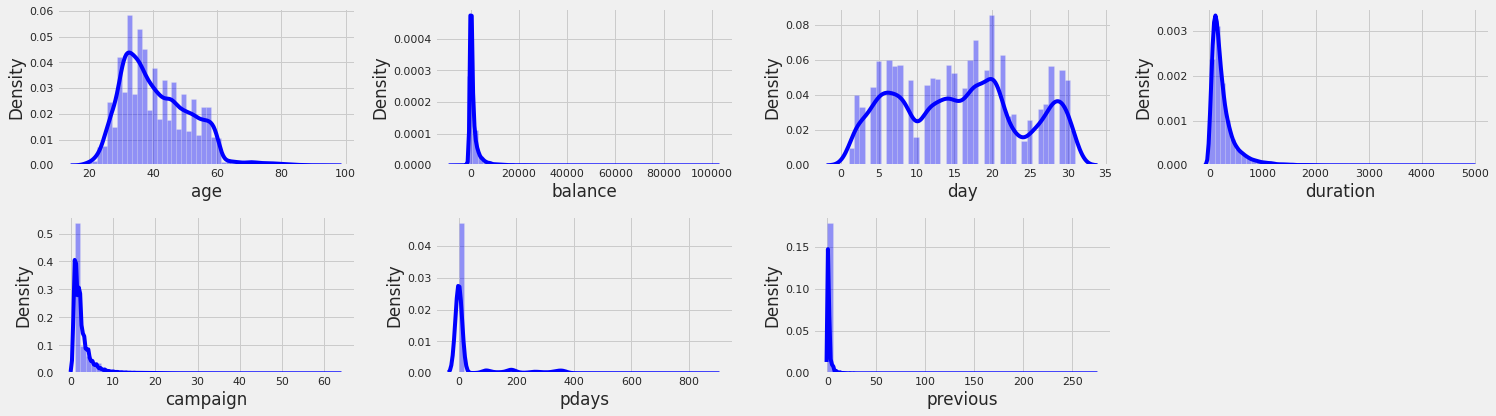

In [18]:
plt.figure(figsize=(21,6))
for i in range(0, len(numericals)):
    plt.subplot(2, 4, i+1)
    sns.distplot(dftrain[numericals[i]], color='blue')
    plt.tight_layout()

In [19]:
for i in range(0, len(numericals)):
    print(f"Skewness {dftrain[numericals].columns[i]} : {dftrain[numericals[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


   
1.Berdasarkan nilai skewness dan visualisasi di atas dapat disimpulkan bahwa tipe data numerikal memiliki pola persebaran data yang ditunjukan dalam bentuk skew positif yang mana nilai mean lebih besar daripada mean, tidak seperti data "day" yang hampir menyerupai distribusi normal.

2.Grafik paling tinggi pada gambar di atas menunjukan jumlah data yang dominan pada setiap data kategorik

###  individual Violin Plots Numericals

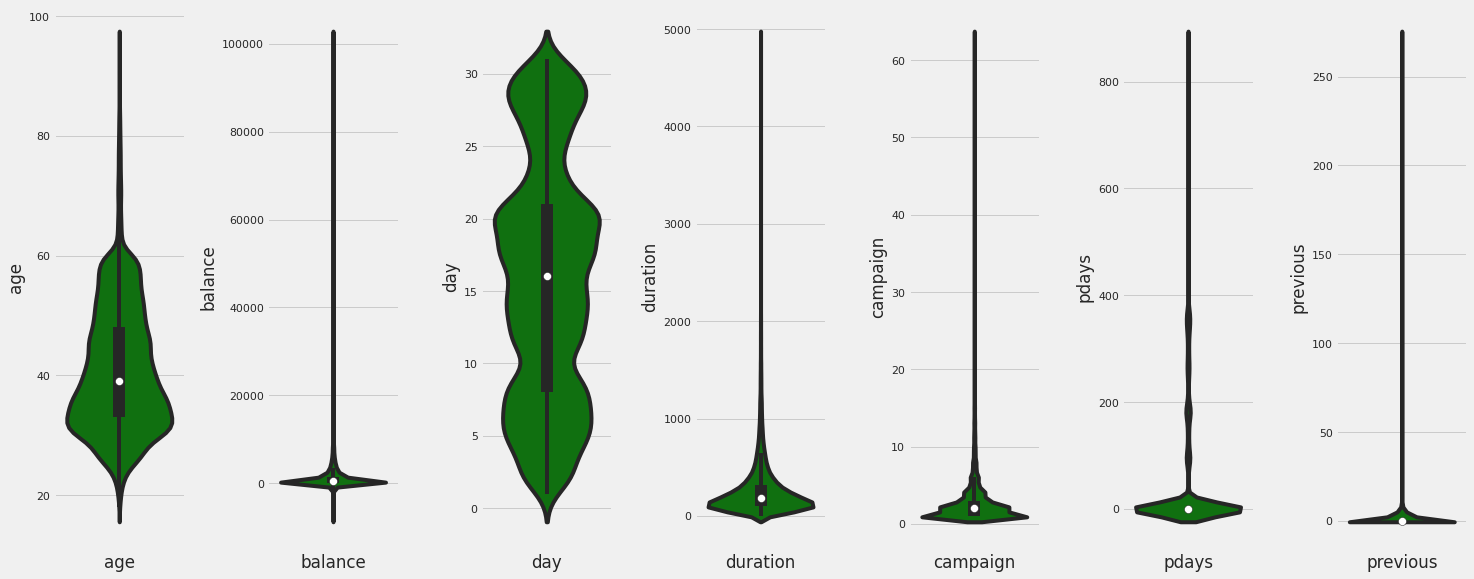

In [36]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=dftrain[features[i]], color ='green') 
    plt.xlabel(features[i]) 
    plt.tight_layout()

### Individual Countplot kategori Categoricals

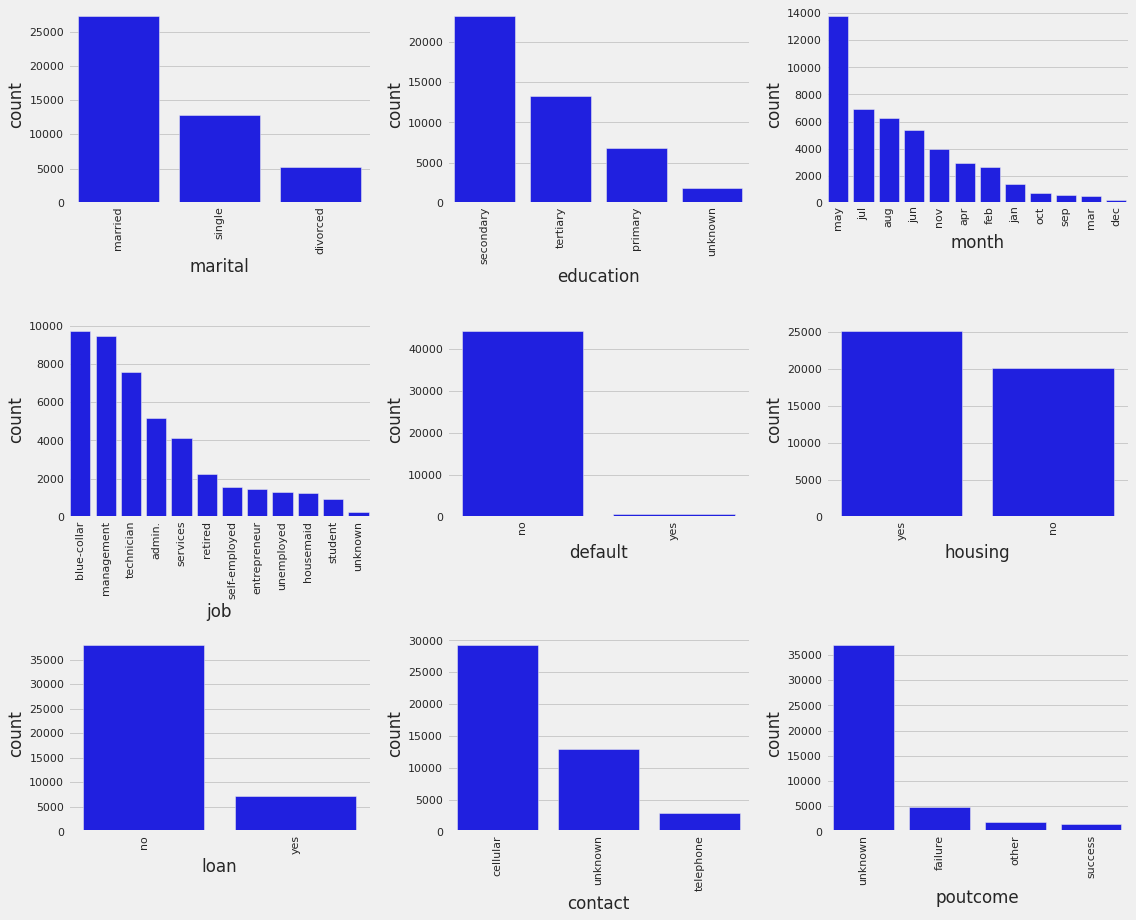

In [21]:
plt.figure(figsize=(16, 13))
for i in range(0, len(categoricals)-1):
    df=dftrain[categoricals[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(dftrain[categoricals[i]], color='blue', orient='h', order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

Beberapa catatan berdasarkan data di atas:

1.Nasabah terbanyak berprofesi sebagai "management"

2.Nasabah dengan status sudah menikah merupakan nasabah terbanyak

3.Pendidikan "secondary" merupakan yang terbanyak

4.default "no" lebih banyak dibandingkan "yes"

5.Nasabah yang memiliki rumah lebih banyak dari yang tidak memilikinya

6.Nasabah dengan status tidak memiliki pinjaman lebih banyak dari yang memiliki

7.Nasabah lebih banyak dihubungi melalui "cellular" daripada telephone

8.Campaign paling banyak dilakukan pada bulan "may" 

9."unknown" merupakan hasil dari kampanye pemasaran terbanyak sebelumnya

### Individual Countplot Numericals

Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

Jawaban :Berdasarkan data numerikal hampir seluruhnya memiliki banyak outlier  (hanya kolom age yg memiliki sedikit oulier) 
Distribusi Normal
- Hanya kolom day saja yg berdistribusi normal
Nilai yg mendominasi
- Kolom balance , duration dan campaign didonminasi oleh nilai yang kecil
untuk kolom age, balance,duration, campaign, pdays,previous menunjukan positif skew dimana mean lebih besar daripada modus.
hal ini harus banyak diperhatikan saat data processing melakukan standarisasi atau normalisasi. Kemudian, menggunakan sebagai besar data saja seperti misal menggunakan 90% data

## Multivariate Analysis

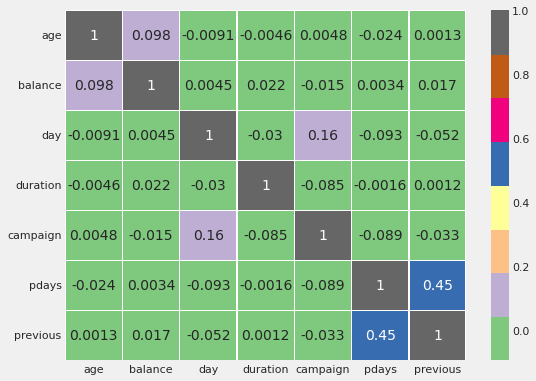

In [26]:
# analisi beberapa kolom sekaligus utuk mencari hubungan antar kolom 
# corelation Heatmap 

plt.figure(figsize=(8,6))
sns.heatmap(dftrain.corr(),annot=True,cmap='Accent',linewidths=0.5);

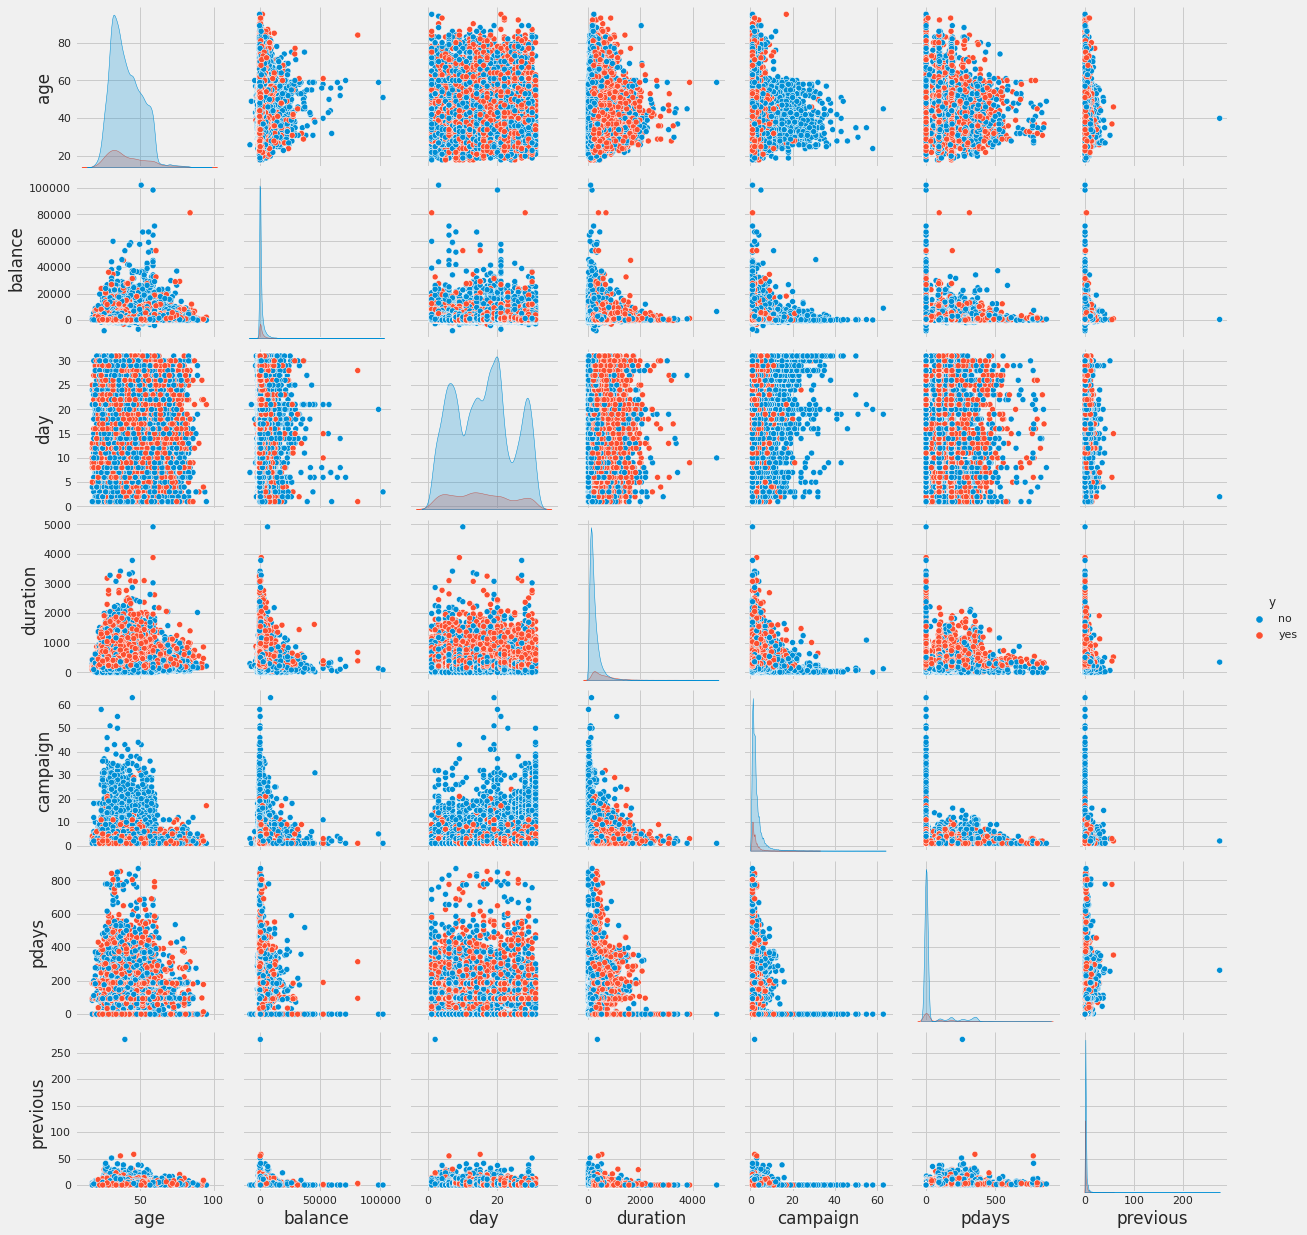

In [31]:
# pair Plots (Interval) 
p=sns.pairplot(dftrain,hue='y')


A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?


Jawaban: <br>
A.  Berdasarkan correlation heatmap dan category plots semua feature masih aman / relevan untuk digunakan.
- Semua feature akan dipertahankan untuk keperluan analisis

B.Korelasi antar feature lemah kecuali "previous" dan "pdays" yang cukup kuat yaitu bernilai 0.45. Semua feature dapat dimanfaatkan untuk analisis.


## Business Insight

In [39]:
dfyes = dftrain[dftrain['y']=='yes']

In [42]:
dfyes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [43]:
dfyes[(dfyes['duration'] >= 120) & (dfyes['duration'] <= 540)].count()

age          3001
job          3001
marital      3001
education    3001
default      3001
balance      3001
housing      3001
loan         3001
contact      3001
day          3001
month        3001
duration     3001
campaign     3001
pdays        3001
previous     3001
poutcome     3001
y            3001
dtype: int64

In [44]:
dfyes[(dfyes['balance'] >= -100) & (dfyes['balance'] <= 1200)].count()

age          3092
job          3092
marital      3092
education    3092
default      3092
balance      3092
housing      3092
loan         3092
contact      3092
day          3092
month        3092
duration     3092
campaign     3092
pdays        3092
previous     3092
poutcome     3092
y            3092
dtype: int64

In [45]:
3092/len(dfyes)

0.5846095670259028

In [46]:
3001/len(dfyes)

0.5674040461334846

In [47]:
dfyes = dftrain[dftrain['y']=='yes']
dfyes = df_yes.copy()

In [48]:
def label_group_balance(row):
  if (row['balance'] >= 1) == True:
    return 'Cocok menerima deposito'
  return 'Tidak cocok untuk menerima deposito'

dfyes['balance group'] = dfyes.apply(lambda row: label_group_balance(row), axis=1)

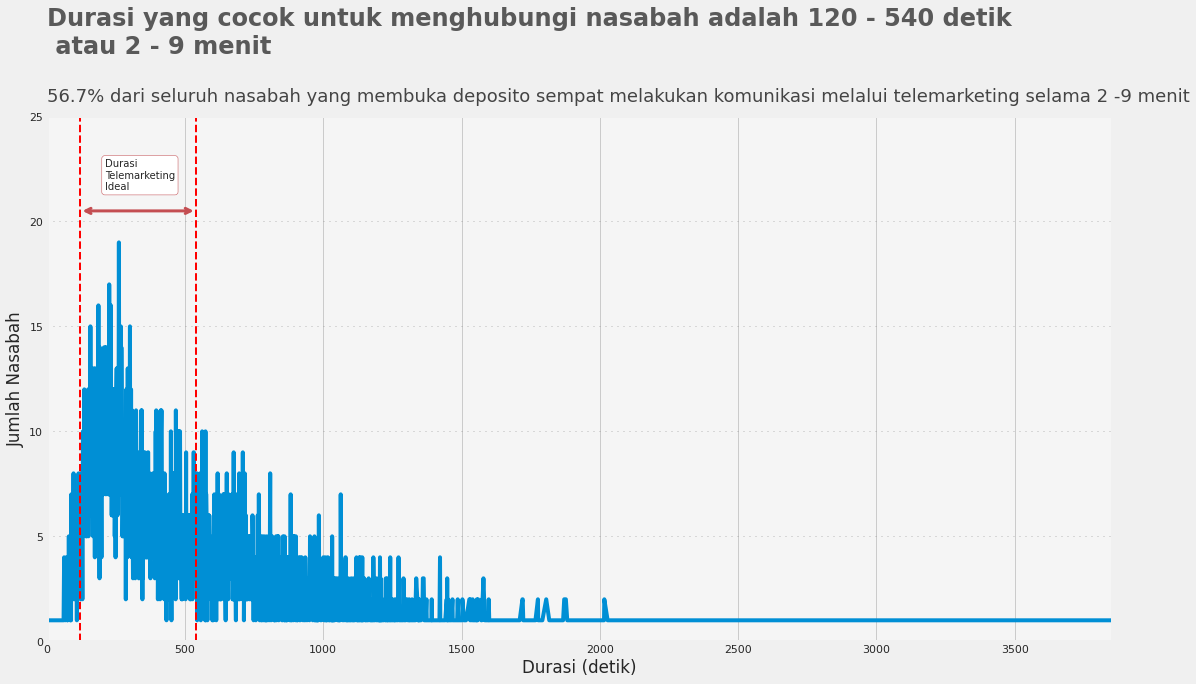

In [49]:
df_plot = dfyes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Jumlah Nasabah')
plt.xlabel('Durasi (detik)')
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5)
ax1.set_facecolor('whitesmoke')

plt.text(x = -0.65, y = 28, s = "Durasi yang cocok untuk menghubungi nasabah adalah 120 - 540 detik \n atau 2 - 9 menit",
                                 fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7, s = "56.7% dari seluruh nasabah yang membuka deposito sempat melakukan komunikasi melalui telemarketing selama 2 -9 menit",
                                 fontsize = 18, alpha = .85)

plt.annotate ('', xy =(122, 20.5),
              xytext =(539, 20.5),
              arrowprops = dict(arrowstyle='<->', connectionstyle="arc3", color='r', lw=3),
              fontsize=13)

plt.text(x = 210, y = 21.5,
         s = 'Durasi\nTelemarketing\nIdeal', fontsize = 10, bbox = dict(boxstyle = "round", fc="1", color='r'))

plt.show()

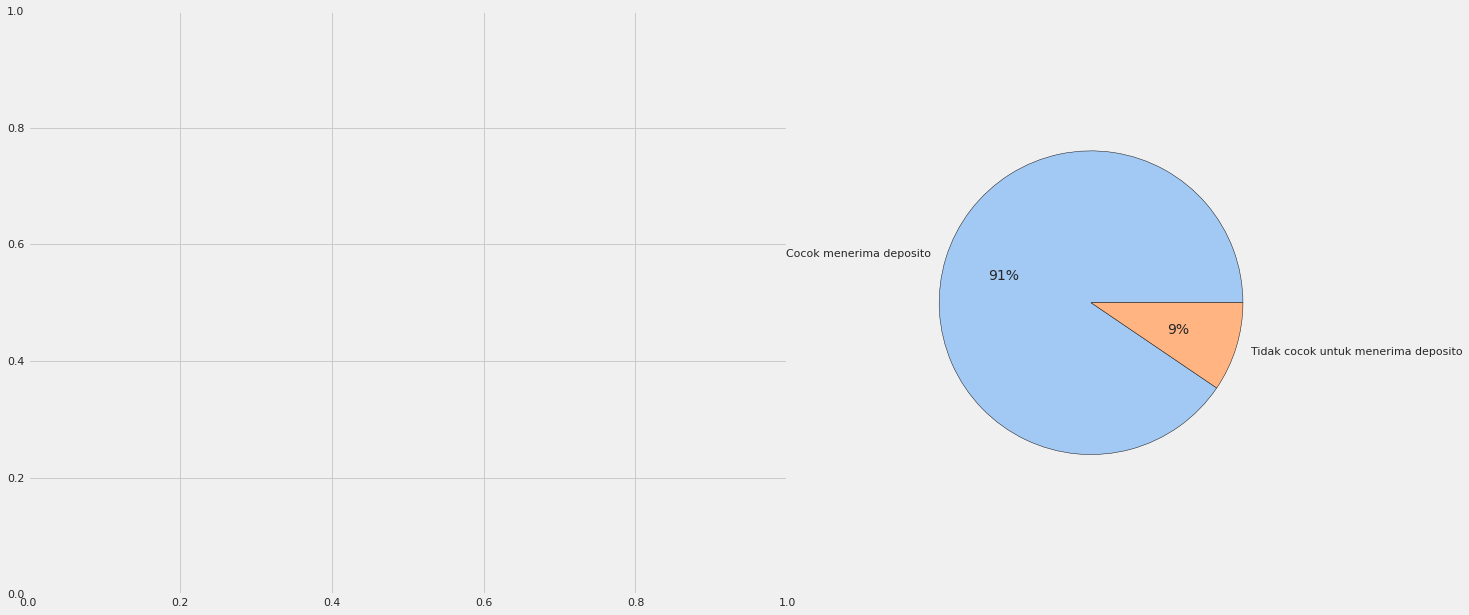

In [51]:
df_plot = dfyes.groupby('balance').agg({'y':'count'}).reset_index().sort_values('y')
df_balance_group = pd.DataFrame(dfyes.groupby(['balance group'])['y'].count()).reset_index()

#Plot graph
fig, ax = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [20, 10]})

ax[1].pie(df_balance_group['y'], labels = df_balance_group['balance group'], colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor": "k"}, autopct='%.0f%%')

plt.savefig('F:\1Rakamin\Rakamin\Bootcamp\Pertemuan 8\archive')

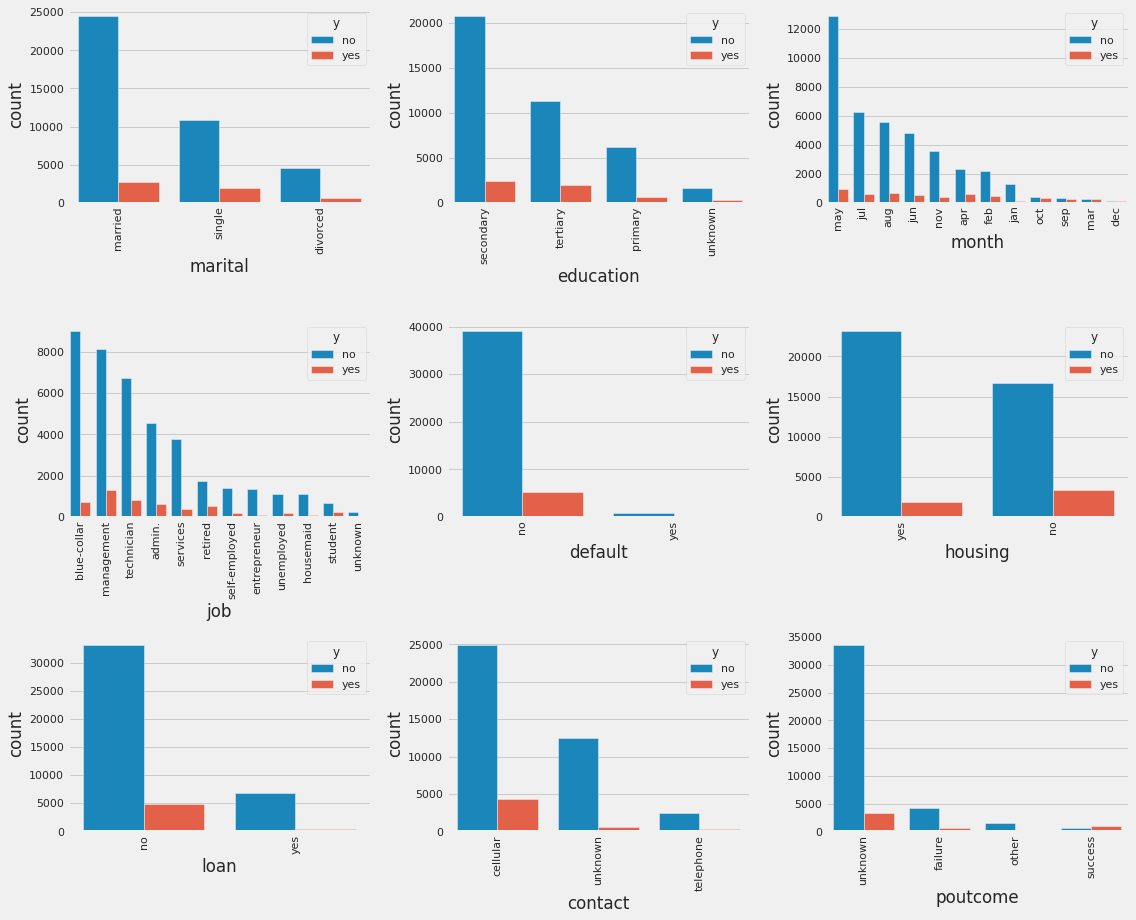

In [30]:
plt.figure(figsize=(16, 13))
for i in range(0, len(categoricals)-1):
    df=dftrain[categoricals[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(x=dftrain[categoricals[i]],hue=dftrain['y'], orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan 
rekomendasinya untuk bisnis.

Berdasarkan visualisasi , ada 3 business insight yang kami dapatkan 
1. Durasi yg cocok untuk menghubungi nasabah adalah sebanyak 2-9 menit 
2. Nasabah dengan balance Sebesar 91% nasabah sangat merekomendasikan untuk 
ditawarkan produk deposito 
3. setelah di analisi status married lah yg menjadi pilihan untuk ditawarkan deposito